# WeatherPy

### Analysis
* OBSERVED TREND 1: The process selected 533 unique cities. On 12/10/2017, the highest temperature was recorded in Santiago del Estero, Argentina at 99.73˚F. The lowest temperature recorded was Ust-Nera, Russia at -44.73˚F. Generally, the highest global temperatures were within the tropics.(The band of latitudes ranging from 23.5˚ south (Tropic of Capricorn) to 23.5˚ north (Tropic of Cancer.)) The two highest temperature points were measured south of the Tropic of Capricorn, which is consistent with the season, as we are approaching the summer solstice in the Southern Hemisphere. Temperatures dropped sharply north of the Tropic of Cancer; all of the below freezing (32˚F) temperatures were in this region. This is consistent with the season, as we are approaching the winter solstice in the Northern Hemisphere.
* OBSERVED TREND 2: On 12/10/2017, the highest wind speed recorded was 47.2 mph in Punta Arenas, Chile, south of the Tropic of Capricorn. The next 6 highest wind speed measurements were recorded north of the Tropic of Cancer. Generally, wind speeds appear to be higher north and south of the tropics, and lower within the tropics. There also appears to be some correlation between coastal locations and wind speeds; wind speed appears to be higher in coastal locations, and lower inland.
* OBSERVED TREND 3: On 12/10/2017, humidity was consistently higher in the tropics, and lower north of the Tropic of Cancer, and south of the Tropic of Capricorn. There appears to be some correlation between coastal locations and humidity; humidity appears to be higher in coastal locations, and lower inland. Cloudiness appears to be distibuted fairly evely around the globe. There was only one location with 100% cloudiness, (Liwale, Tanzania) while there were 130 location with 0% cloudiness.


###### Developer notes and caveats:
* Looking at the assignment, my strategy was to select a set of random uniform coordinates ranged using the minimum and maximum latitude and longitude coordinates of the planet. I used integers for these, as I wanted to remove duplicates before calling the citipy nearest city functionality. Logically, the citipy library will return many duplicates, as the random coordinates set will contain locations in the water, and citipy will return the same nearest city for diverse in-the-water coordinates.
* I was not happy with the latitude xlims of -80, +100 in the example document, so I restored them to -90, +90. Also, the wind speed ylim of 40 shown in the example document excluded my max wind speed, so I adjusted it to 50.
* Finally, I have added some additional features to the assignment, as I believe that they help to visualize the data. I cleared this with Ben Fuja before submitting the assignment.

#### Dependencies

In [1]:
import numpy as np                                                           # numpy library

In [2]:
import pandas as pd                                                          # pandas library

In [3]:
import matplotlib.pyplot as plt                                              # pyplot module from matplotlib library

In [4]:
import matplotlib.patches as mpatches                                        # patches module from matplotlib library

In [5]:
import seaborn as sns                                                        # seaborn library

In [6]:
from citipy import citipy                                                    # citipy module from citipy library

In [7]:
from random import uniform                                                   # uniform module from random library

In [8]:
import requests                                                              # requests library

In [9]:
from datetime import datetime                                                # datetime module from datetime library

In [10]:
import time                                                                  # time library, api call compliance

In [11]:
def newcoord():
    """ newcoord function
    Args: None
    Returns: tuple of integers (int) representing x and y coordinates
    x random unifrom distribution between -90 and 90 (latitude)
    y random uniform distribution between -180 and 180 (longitude)
    """
    return (int(uniform(-90,90)), int(uniform(-180, 180)))

In [12]:
coords = []                                                                  # initializes empty list 

In [13]:
# creates generator object containing 1600 sets of random latitude and longitude coordinates
# 1600 selected becuase it consistently provides city list over 500 once duplicates are removed
x_and_y = (newcoord() for x in range(1600))

In [17]:
for coord in x_and_y:                                                        # iterates through generator
    coords.append(coord)                                                     # appends tuple to list

In [18]:
unique_coords = set(coords)                                                  # casts to set to remove duplicates

In [19]:
len(unique_coords)                                                           # checks length of set (s/b < 1600)

1571

#### Generate Cities List

In [20]:
cities = []                                                                  # initializes empty list 

In [21]:
for coord_tup in unique_coords:                                              # iterates through list
    lat, lng = coord_tup                                                     # unpacks tuple
    cities.append(citipy.nearest_city(lat, lng))                             # appends citipy object to list

In [22]:
unique_cities = set(cities)                                                  # casts to set to remove duplicates

In [23]:
len(unique_cities)                                                           # checks length of set (s/b > 500)

648

In [24]:
# creates an initial dataframe using list comprehensions
cities_df = pd.DataFrame({'City': [city.city_name for city in unique_cities], 
                          'Country': [city.country_code.upper() for city in unique_cities]})

In [25]:
cities_df['Cloudiness'] = ''                                                 # adds columns to be filled by API calls
cities_df['Date'] = ''
cities_df['Humidity'] = ''
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Wind Speed'] = ''

#### Perform API Calls

In [26]:
records = 0                                                                  # initializes record counter
max_calls = 50                                                               # used to prevent exceeding API limit
sets = 1                                                                     # initializes set counter

In [27]:
endpoint = 'http://api.openweathermap.org/data/2.5/weather'                  # base URL for API calls
units = 'imperial'                                                           # specifies Fahrenheit temperatures 
api_key = '38b8308a2133ec338a39cf692b1a7ce3'                                 # API key provided by service

params = {                                                                   # Build partial query URL
    'appid': api_key,
    'units': units
}

In [28]:
print("-----------------------------------------------------------")         # displays API call header
print("Beginning Data Retrieval")
print("-----------------------------------------------------------")

for index, row in cities_df.iterrows():                                      # iterates through rows of dataset
    if records == max_calls:
        time.sleep(60)                                                       # pause, API compliance
        sets += 1                                                            # increments set counter
        records = 0                                                          # resets record counter
    
    params['q'] = row['City'] + ',' + row['Country']                         # adds city and country to parameters
    a, u, q = params.values()                                                # unpacks parameters for display
    
    displayurl = endpoint + '?' + 'appid=' + a + '&units=' + u + '&q=' + q   # concatenates display URL
        
    # displays record status and display URL
    print("Processing Record " + str(records) + " of Set " + str(sets) + " | " + q)
    print(displayurl)
        
    try:                                                                     # exception handing for city not found
        response = requests.get(endpoint, params=params).json()              # API call
        
    except:
        print(q + ": City not found, Skipping...")                           # city not found
        
    try:                                                                     # exception handling for missing data
        cities_df.set_value(index, 'Cloudiness', response['clouds']['all'])
        dv = datetime.fromtimestamp(int(response['dt'])).strftime('%m/%d/%Y')
        cities_df.set_value(index, 'Date', dv)
        cities_df.set_value(index, 'Humidity', response['main']['humidity'])
        cities_df.set_value(index, 'Lat', response['coord']['lat'])
        cities_df.set_value(index, 'Lng', response['coord']['lon'])
        cities_df.set_value(index, 'Max Temp', response['main']['temp_max'])
        cities_df.set_value(index, 'Wind Speed', response['wind']['speed'])
        
    except:
        print(q + ": Missing Data...")                                       # city missing data
    records += 1
        
print("-----------------------------------------------------------")         # displays API call footer       
print("Data Retrieval Complete")
print("-----------------------------------------------------------")

-----------------------------------------------------------
Beginning Data Retrieval
-----------------------------------------------------------
Processing Record 0 of Set 1 | yulin,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yulin,CN
Processing Record 1 of Set 1 | saleaula,WS
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saleaula,WS


d:\dev\python36\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\dev\python36\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\dev\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\dev\python36\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\dev\python36\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\dev\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: 

saleaula,WS: Missing Data...
Processing Record 2 of Set 1 | milledgeville,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=milledgeville,US
Processing Record 3 of Set 1 | dingle,IE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dingle,IE


Processing Record 4 of Set 1 | nizhniy chir,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nizhniy chir,RU
Processing Record 5 of Set 1 | tuatapere,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tuatapere,NZ


Processing Record 6 of Set 1 | ishigaki,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ishigaki,JP
Processing Record 7 of Set 1 | uray,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=uray,RU


Processing Record 8 of Set 1 | yumen,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yumen,CN
Processing Record 9 of Set 1 | cap malheureux,MU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cap malheureux,MU


Processing Record 10 of Set 1 | samalaeulu,WS
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=samalaeulu,WS
samalaeulu,WS: Missing Data...
Processing Record 11 of Set 1 | cabedelo,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cabedelo,BR


Processing Record 12 of Set 1 | poletayevo,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=poletayevo,RU
Processing Record 13 of Set 1 | chirkey,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chirkey,RU


Processing Record 14 of Set 1 | hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hilo,US
Processing Record 15 of Set 1 | genhe,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=genhe,CN


Processing Record 16 of Set 1 | lamesa,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lamesa,US
Processing Record 17 of Set 1 | bengkulu,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bengkulu,ID


bengkulu,ID: Missing Data...
Processing Record 18 of Set 1 | samusu,WS
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=samusu,WS
samusu,WS: Missing Data...
Processing Record 19 of Set 1 | pontivy,FR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=pontivy,FR


Processing Record 20 of Set 1 | aktau,KZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=aktau,KZ
Processing Record 21 of Set 1 | denpasar,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=denpasar,ID


Processing Record 22 of Set 1 | kahului,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kahului,US
Processing Record 23 of Set 1 | kavieng,PG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kavieng,PG
Processing Record 24 of Set 1 | ponta do sol,CV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ponta do sol,CV


Processing Record 25 of Set 1 | hunza,PK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hunza,PK
hunza,PK: Missing Data...
Processing Record 26 of Set 1 | tokur,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tokur,RU


Processing Record 27 of Set 1 | balakhninskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=balakhninskiy,RU
Processing Record 28 of Set 1 | anloga,GH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=anloga,GH


Processing Record 29 of Set 1 | ust-kulom,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ust-kulom,RU
Processing Record 30 of Set 1 | karratha,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=karratha,AU


Processing Record 31 of Set 1 | touros,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=touros,BR
Processing Record 32 of Set 1 | kongolo,CD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kongolo,CD


Processing Record 33 of Set 1 | katherine,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=katherine,AU
Processing Record 34 of Set 1 | kisangani,CD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kisangani,CD


Processing Record 35 of Set 1 | chokurdakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chokurdakh,RU
Processing Record 36 of Set 1 | polunochnoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=polunochnoye,RU


Processing Record 37 of Set 1 | kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kapaa,US
Processing Record 38 of Set 1 | banepa,NP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=banepa,NP


Processing Record 39 of Set 1 | sal rei,CV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sal rei,CV
Processing Record 40 of Set 1 | maturin,VE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=maturin,VE


Processing Record 41 of Set 1 | caravelas,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=caravelas,BR
Processing Record 42 of Set 1 | sao filipe,CV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sao filipe,CV


Processing Record 43 of Set 1 | zhigansk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=zhigansk,RU
Processing Record 44 of Set 1 | gumusyaka,TR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gumusyaka,TR


gumusyaka,TR: Missing Data...
Processing Record 45 of Set 1 | astana,KZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=astana,KZ
Processing Record 46 of Set 1 | piryion,GR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=piryion,GR


piryion,GR: Missing Data...
Processing Record 47 of Set 1 | illoqqortoormiut,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=illoqqortoormiut,GL
illoqqortoormiut,GL: Missing Data...
Processing Record 48 of Set 1 | ust-maya,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ust-maya,RU


Processing Record 49 of Set 1 | ibipeba,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ibipeba,BR


Processing Record 0 of Set 2 | sa kaeo,TH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sa kaeo,TH
Processing Record 1 of Set 2 | labutta,MM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=labutta,MM


labutta,MM: Missing Data...
Processing Record 2 of Set 2 | ust-nera,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ust-nera,RU
Processing Record 3 of Set 2 | ilulissat,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ilulissat,GL


Processing Record 4 of Set 2 | ende,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ende,ID
Processing Record 5 of Set 2 | vila do maio,CV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vila do maio,CV


Processing Record 6 of Set 2 | kununurra,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kununurra,AU
Processing Record 7 of Set 2 | piranshahr,IR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=piranshahr,IR


Processing Record 8 of Set 2 | luderitz,NA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=luderitz,NA
Processing Record 9 of Set 2 | aquiraz,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=aquiraz,BR


Processing Record 10 of Set 2 | klaksvik,FO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=klaksvik,FO


Processing Record 11 of Set 2 | shache,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=shache,CN
Processing Record 12 of Set 2 | sergeyevka,KZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sergeyevka,KZ


Processing Record 13 of Set 2 | iramuco,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=iramuco,MX


Processing Record 14 of Set 2 | nanortalik,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nanortalik,GL
Processing Record 15 of Set 2 | tommot,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tommot,RU


Processing Record 16 of Set 2 | dhangadhi,NP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dhangadhi,NP
Processing Record 17 of Set 2 | codrington,AG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=codrington,AG


codrington,AG: Missing Data...
Processing Record 18 of Set 2 | lagunas,PE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lagunas,PE
Processing Record 19 of Set 2 | narsaq,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=narsaq,GL


Processing Record 20 of Set 2 | beloha,MG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=beloha,MG
Processing Record 21 of Set 2 | karaul,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=karaul,RU


karaul,RU: Missing Data...
Processing Record 22 of Set 2 | lorengau,PG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lorengau,PG


Processing Record 23 of Set 2 | qeshm,IR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=qeshm,IR
Processing Record 24 of Set 2 | nakamura,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nakamura,JP


Processing Record 25 of Set 2 | kiruna,SE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kiruna,SE
Processing Record 26 of Set 2 | lufkin,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lufkin,US


Processing Record 27 of Set 2 | nuuk,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nuuk,GL
Processing Record 28 of Set 2 | tezu,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tezu,IN


Processing Record 29 of Set 2 | camacha,PT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=camacha,PT
Processing Record 30 of Set 2 | omaruru,NA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=omaruru,NA


Processing Record 31 of Set 2 | qaanaaq,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=qaanaaq,GL
Processing Record 32 of Set 2 | tomatlan,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tomatlan,MX


Processing Record 33 of Set 2 | kisarawe,TZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kisarawe,TZ
Processing Record 34 of Set 2 | paamiut,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=paamiut,GL


Processing Record 35 of Set 2 | fortuna foothills,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=fortuna foothills,US
Processing Record 36 of Set 2 | smirnykh,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=smirnykh,RU


Processing Record 37 of Set 2 | bontang,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bontang,ID
Processing Record 38 of Set 2 | morehead,PG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=morehead,PG


Processing Record 39 of Set 2 | santa cruz,CR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=santa cruz,CR
Processing Record 40 of Set 2 | shubarkuduk,KZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=shubarkuduk,KZ


Processing Record 41 of Set 2 | sonari,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sonari,IN
Processing Record 42 of Set 2 | hamilton,BM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hamilton,BM


Processing Record 43 of Set 2 | kodinar,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kodinar,IN
Processing Record 44 of Set 2 | sidi ali,DZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sidi ali,DZ


Processing Record 45 of Set 2 | vao,NC
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vao,NC
Processing Record 46 of Set 2 | lewisporte,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lewisporte,CA


Processing Record 47 of Set 2 | andenes,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=andenes,NO
Processing Record 48 of Set 2 | bougouni,ML
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bougouni,ML


Processing Record 49 of Set 2 | zagreb,HR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=zagreb,HR


Processing Record 0 of Set 3 | tazmalt,DZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tazmalt,DZ
Processing Record 1 of Set 3 | shakiso,ET
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=shakiso,ET


Processing Record 2 of Set 3 | attawapiskat,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=attawapiskat,CA
attawapiskat,CA: Missing Data...
Processing Record 3 of Set 3 | bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bredasdorp,ZA


Processing Record 4 of Set 3 | kang,BW
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kang,BW
Processing Record 5 of Set 3 | yelan,RU


http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yelan,RU
Processing Record 6 of Set 3 | kalmunai,LK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kalmunai,LK


Processing Record 7 of Set 3 | vung tau,VN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vung tau,VN
Processing Record 8 of Set 3 | kruisfontein,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kruisfontein,ZA


Processing Record 9 of Set 3 | timra,SE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=timra,SE
Processing Record 10 of Set 3 | prieska,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=prieska,ZA


Processing Record 11 of Set 3 | moron,MN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=moron,MN
Processing Record 12 of Set 3 | carpentras,FR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=carpentras,FR


Processing Record 13 of Set 3 | santa rosa,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=santa rosa,AR


Processing Record 14 of Set 3 | nuevitas,CU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nuevitas,CU
Processing Record 15 of Set 3 | isangel,VU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=isangel,VU


Processing Record 16 of Set 3 | gao,ML
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gao,ML
Processing Record 17 of Set 3 | tuggurt,DZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tuggurt,DZ


tuggurt,DZ: Missing Data...
Processing Record 18 of Set 3 | ulaanbaatar,MN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ulaanbaatar,MN
Processing Record 19 of Set 3 | providencia,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=providencia,MX


Processing Record 20 of Set 3 | pangnirtung,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=pangnirtung,CA
Processing Record 21 of Set 3 | belaya gora,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=belaya gora,RU


Processing Record 22 of Set 3 | pahrump,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=pahrump,US
Processing Record 23 of Set 3 | westwood,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=westwood,US


Processing Record 24 of Set 3 | palora,EC
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=palora,EC
Processing Record 25 of Set 3 | lushunkou,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lushunkou,CN


lushunkou,CN: Missing Data...
Processing Record 26 of Set 3 | butterworth,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=butterworth,ZA
Processing Record 27 of Set 3 | goderich,SL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=goderich,SL


goderich,SL: Missing Data...
Processing Record 28 of Set 3 | alekseyevsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=alekseyevsk,RU
Processing Record 29 of Set 3 | arlit,NE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=arlit,NE


Processing Record 30 of Set 3 | srednekolymsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=srednekolymsk,RU
Processing Record 31 of Set 3 | monte alegre,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=monte alegre,BR


Processing Record 32 of Set 3 | ribeira grande,PT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ribeira grande,PT
Processing Record 33 of Set 3 | sao joao da barra,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sao joao da barra,BR


Processing Record 34 of Set 3 | westpunt,AN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=westpunt,AN
westpunt,AN: Missing Data...
Processing Record 35 of Set 3 | sola,VU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sola,VU


Processing Record 36 of Set 3 | tarauaca,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tarauaca,BR
Processing Record 37 of Set 3 | cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cape town,ZA


Processing Record 38 of Set 3 | vila,VU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vila,VU
vila,VU: Missing Data...
Processing Record 39 of Set 3 | morgan city,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=morgan city,US


Processing Record 40 of Set 3 | bilma,NE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bilma,NE
Processing Record 41 of Set 3 | dindori,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dindori,IN


Processing Record 42 of Set 3 | barrhead,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=barrhead,CA
Processing Record 43 of Set 3 | saldanha,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saldanha,ZA


Processing Record 44 of Set 3 | kaeo,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kaeo,NZ
Processing Record 45 of Set 3 | atkarsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=atkarsk,RU


Processing Record 46 of Set 3 | margate,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=margate,ZA
Processing Record 47 of Set 3 | astoria,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=astoria,US


Processing Record 48 of Set 3 | bay roberts,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bay roberts,CA
Processing Record 49 of Set 3 | ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ushuaia,AR


Processing Record 0 of Set 4 | tumannyy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tumannyy,RU
tumannyy,RU: Missing Data...
Processing Record 1 of Set 4 | ziarat,PK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ziarat,PK


Processing Record 2 of Set 4 | atuona,PF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=atuona,PF
Processing Record 3 of Set 4 | demmin,DE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=demmin,DE


Processing Record 4 of Set 4 | kaitangata,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kaitangata,NZ
Processing Record 5 of Set 4 | venado tuerto,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=venado tuerto,AR


Processing Record 6 of Set 4 | arona,ES
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=arona,ES
Processing Record 7 of Set 4 | riyadh,SA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=riyadh,SA


Processing Record 8 of Set 4 | puerto escondido,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=puerto escondido,MX
Processing Record 9 of Set 4 | maneadero,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=maneadero,MX


Processing Record 10 of Set 4 | kontagora,NG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kontagora,NG
Processing Record 11 of Set 4 | los llanos de aridane,ES
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=los llanos de aridane,ES


Processing Record 12 of Set 4 | calamar,CO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=calamar,CO
Processing Record 13 of Set 4 | fonte boa,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=fonte boa,BR


Processing Record 14 of Set 4 | vaitupu,WF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vaitupu,WF
vaitupu,WF: Missing Data...
Processing Record 15 of Set 4 | faanui,PF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=faanui,PF


Processing Record 16 of Set 4 | karamea,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=karamea,NZ
karamea,NZ: Missing Data...
Processing Record 17 of Set 4 | naliya,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=naliya,IN
Processing Record 18 of Set 4 | tungor,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tungor,RU


Processing Record 19 of Set 4 | matara,LK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=matara,LK


Processing Record 20 of Set 4 | baijiantan,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=baijiantan,CN
Processing Record 21 of Set 4 | diu,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=diu,IN


Processing Record 22 of Set 4 | puerto ayora,EC
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=puerto ayora,EC
Processing Record 23 of Set 4 | boone,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=boone,US


Processing Record 24 of Set 4 | talnakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=talnakh,RU
Processing Record 25 of Set 4 | edd,ER
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=edd,ER


Processing Record 26 of Set 4 | hurricane,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hurricane,US
Processing Record 27 of Set 4 | souillac,MU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=souillac,MU


Processing Record 28 of Set 4 | ndjole,GA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ndjole,GA
Processing Record 29 of Set 4 | ostrovnoy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ostrovnoy,RU


Processing Record 30 of Set 4 | ventspils,LV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ventspils,LV
Processing Record 31 of Set 4 | sinkat,SD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sinkat,SD


sinkat,SD: Missing Data...
Processing Record 32 of Set 4 | grand river south east,MU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=grand river south east,MU
grand river south east,MU: Missing Data...
Processing Record 33 of Set 4 | chandur,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chandur,IN


Processing Record 34 of Set 4 | yulara,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yulara,AU
Processing Record 35 of Set 4 | coquimbo,CL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=coquimbo,CL


Processing Record 36 of Set 4 | lavrentiya,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lavrentiya,RU
Processing Record 37 of Set 4 | andros town,BS
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=andros town,BS


Processing Record 38 of Set 4 | boguchany,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=boguchany,RU
Processing Record 39 of Set 4 | galveston,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=galveston,US


Processing Record 40 of Set 4 | tocopilla,CL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tocopilla,CL
Processing Record 41 of Set 4 | kaya,BF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kaya,BF


Processing Record 42 of Set 4 | litovko,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=litovko,RU
Processing Record 43 of Set 4 | tabou,CI
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tabou,CI


Processing Record 44 of Set 4 | butaritari,KI
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=butaritari,KI
Processing Record 45 of Set 4 | derzhavinsk,KZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=derzhavinsk,KZ


Processing Record 46 of Set 4 | boende,CD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=boende,CD
Processing Record 47 of Set 4 | awbari,LY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=awbari,LY


Processing Record 48 of Set 4 | otradnoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=otradnoye,RU
Processing Record 49 of Set 4 | dhidhdhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dhidhdhoo,MV


Processing Record 0 of Set 5 | kamyaran,IR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kamyaran,IR
Processing Record 1 of Set 5 | gushikawa,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gushikawa,JP


Processing Record 2 of Set 5 | tiassale,CI
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tiassale,CI


Processing Record 3 of Set 5 | cidreira,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cidreira,BR
Processing Record 4 of Set 5 | marsh harbour,BS
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=marsh harbour,BS


Processing Record 5 of Set 5 | berlevag,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=berlevag,NO
Processing Record 6 of Set 5 | eyl,SO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=eyl,SO


Processing Record 7 of Set 5 | dmytrivka,UA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dmytrivka,UA


Processing Record 8 of Set 5 | brewster,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=brewster,US
Processing Record 9 of Set 5 | mahebourg,MU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mahebourg,MU


Processing Record 10 of Set 5 | rawannawi,KI
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rawannawi,KI
rawannawi,KI: Missing Data...
Processing Record 11 of Set 5 | tawkar,SD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tawkar,SD
tawkar,SD: Missing Data...
Processing Record 12 of Set 5 | lingyuan,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lingyuan,CN


Processing Record 13 of Set 5 | porbandar,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=porbandar,IN
Processing Record 14 of Set 5 | izumo,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=izumo,JP


Processing Record 15 of Set 5 | motygino,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=motygino,RU
Processing Record 16 of Set 5 | nushki,PK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nushki,PK


Processing Record 17 of Set 5 | artyom,AZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=artyom,AZ
Processing Record 18 of Set 5 | hithadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hithadhoo,MV


Processing Record 19 of Set 5 | petropavlovsk-kamchatskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=petropavlovsk-kamchatskiy,RU
Processing Record 20 of Set 5 | tabiauea,KI
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tabiauea,KI
tabiauea,KI: Missing Data...
Processing Record 21 of Set 5 | chagda,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chagda,RU
chagda,RU: Missing Data...
Processing Record 22 of Set 5 | chatra,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chatra,IN


Processing Record 23 of Set 5 | mar del plata,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mar del plata,AR
Processing Record 24 of Set 5 | umm durman,SD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=umm durman,SD


umm durman,SD: Missing Data...
Processing Record 25 of Set 5 | ambon,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ambon,ID
Processing Record 26 of Set 5 | kudahuvadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kudahuvadhoo,MV


Processing Record 27 of Set 5 | gat,LY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gat,LY
gat,LY: Missing Data...
Processing Record 28 of Set 5 | fortuna,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=fortuna,US
Processing Record 29 of Set 5 | mabaruma,GY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mabaruma,GY


Processing Record 30 of Set 5 | leningradskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=leningradskiy,RU
Processing Record 31 of Set 5 | airai,PW
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=airai,PW


airai,PW: Missing Data...
Processing Record 32 of Set 5 | kloulklubed,PW
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kloulklubed,PW
Processing Record 33 of Set 5 | tahoua,NE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tahoua,NE


Processing Record 34 of Set 5 | marcona,PE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=marcona,PE
marcona,PE: Missing Data...
Processing Record 35 of Set 5 | nova olinda do norte,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nova olinda do norte,BR


Processing Record 36 of Set 5 | avarua,CK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=avarua,CK
Processing Record 37 of Set 5 | jalu,LY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=jalu,LY


Processing Record 38 of Set 5 | muli,MV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=muli,MV


Processing Record 39 of Set 5 | chavakkad,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chavakkad,IN
Processing Record 40 of Set 5 | fatezh,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=fatezh,RU


Processing Record 41 of Set 5 | atambua,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=atambua,ID
Processing Record 42 of Set 5 | eten,PE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=eten,PE


Processing Record 43 of Set 5 | ancud,CL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ancud,CL


Processing Record 44 of Set 5 | meyungs,PW
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=meyungs,PW
meyungs,PW: Missing Data...
Processing Record 45 of Set 5 | neuquen,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=neuquen,AR
Processing Record 46 of Set 5 | rostovka,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rostovka,RU


Processing Record 47 of Set 5 | price,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=price,US


Processing Record 48 of Set 5 | akhmim,EG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=akhmim,EG
Processing Record 49 of Set 5 | lebu,CL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lebu,CL


Processing Record 0 of Set 6 | moroni,KM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=moroni,KM
Processing Record 1 of Set 6 | yar-sale,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yar-sale,RU


Processing Record 2 of Set 6 | thinadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=thinadhoo,MV
Processing Record 3 of Set 6 | odweyne,SO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=odweyne,SO


odweyne,SO: Missing Data...
Processing Record 4 of Set 6 | batagay-alyta,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=batagay-alyta,RU


Processing Record 5 of Set 6 | linxia,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=linxia,CN
Processing Record 6 of Set 6 | saint anthony,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saint anthony,CA


saint anthony,CA: Missing Data...
Processing Record 7 of Set 6 | aswan,EG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=aswan,EG
Processing Record 8 of Set 6 | scarborough,GB
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=scarborough,GB


Processing Record 9 of Set 6 | saint george,BM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saint george,BM
Processing Record 10 of Set 6 | georgiyevskoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=georgiyevskoye,RU


Processing Record 11 of Set 6 | asau,TV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=asau,TV
asau,TV: Missing Data...
Processing Record 12 of Set 6 | opuwo,NA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=opuwo,NA


Processing Record 13 of Set 6 | burica,PA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=burica,PA
burica,PA: Missing Data...
Processing Record 14 of Set 6 | hualmay,PE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hualmay,PE


Processing Record 15 of Set 6 | husavik,IS
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=husavik,IS
Processing Record 16 of Set 6 | lolua,TV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lolua,TV
lolua,TV: Missing Data...


Processing Record 17 of Set 6 | tasiilaq,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tasiilaq,GL
Processing Record 18 of Set 6 | maumere,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=maumere,ID
Processing Record 19 of Set 6 | yerbogachen,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yerbogachen,RU


Processing Record 20 of Set 6 | aragarcas,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=aragarcas,BR
Processing Record 21 of Set 6 | upernavik,GL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=upernavik,GL


Processing Record 22 of Set 6 | atar,MR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=atar,MR
Processing Record 23 of Set 6 | tainan,TW
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tainan,TW


Processing Record 24 of Set 6 | rincon,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rincon,US
Processing Record 25 of Set 6 | portland,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=portland,AU


Processing Record 26 of Set 6 | saskylakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saskylakh,RU
Processing Record 27 of Set 6 | port lincoln,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=port lincoln,AU


Processing Record 28 of Set 6 | zhaozhou,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=zhaozhou,CN
Processing Record 29 of Set 6 | acapulco,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=acapulco,MX


Processing Record 30 of Set 6 | olafsvik,IS
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=olafsvik,IS
olafsvik,IS: Missing Data...
Processing Record 31 of Set 6 | east london,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=east london,ZA


Processing Record 32 of Set 6 | nouadhibou,MR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nouadhibou,MR
Processing Record 33 of Set 6 | samarai,PG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=samarai,PG


Processing Record 34 of Set 6 | bilibino,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bilibino,RU
Processing Record 35 of Set 6 | nouakchott,MR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nouakchott,MR


Processing Record 36 of Set 6 | gorontalo,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gorontalo,ID
Processing Record 37 of Set 6 | akdepe,TM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=akdepe,TM


Processing Record 38 of Set 6 | vanimo,PG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vanimo,PG
Processing Record 39 of Set 6 | portree,GB
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=portree,GB


Processing Record 40 of Set 6 | san juan,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=san juan,US
Processing Record 41 of Set 6 | mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mataura,PF


mataura,PF: Missing Data...
Processing Record 42 of Set 6 | eirunepe,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=eirunepe,BR


Processing Record 43 of Set 6 | sobolevo,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sobolevo,RU
Processing Record 44 of Set 6 | rockingham,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rockingham,US


Processing Record 45 of Set 6 | constitucion,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=constitucion,MX


Processing Record 46 of Set 6 | moerai,PF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=moerai,PF
Processing Record 47 of Set 6 | vestmannaeyjar,IS
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vestmannaeyjar,IS


Processing Record 48 of Set 6 | kaduy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kaduy,RU


Processing Record 49 of Set 6 | belmonte,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=belmonte,BR


Processing Record 0 of Set 7 | roma,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=roma,AU
Processing Record 1 of Set 7 | vidim,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vidim,RU


Processing Record 2 of Set 7 | inyonga,TZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=inyonga,TZ
Processing Record 3 of Set 7 | polis,CY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=polis,CY


Processing Record 4 of Set 7 | toucheng,TW
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=toucheng,TW
Processing Record 5 of Set 7 | whitley bay,GB
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=whitley bay,GB


Processing Record 6 of Set 7 | coahuayana,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=coahuayana,MX


Processing Record 7 of Set 7 | rocha,UY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rocha,UY
Processing Record 8 of Set 7 | saint-francois,GP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saint-francois,GP


Processing Record 9 of Set 7 | bacuit,PH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bacuit,PH
bacuit,PH: Missing Data...
Processing Record 10 of Set 7 | beihai,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=beihai,CN


Processing Record 11 of Set 7 | skibbereen,IE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=skibbereen,IE
Processing Record 12 of Set 7 | paracuru,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=paracuru,BR


Processing Record 13 of Set 7 | buchanan,LR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=buchanan,LR
Processing Record 14 of Set 7 | mehamn,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mehamn,NO


Processing Record 15 of Set 7 | beipiao,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=beipiao,CN
Processing Record 16 of Set 7 | lodwar,KE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lodwar,KE


Processing Record 17 of Set 7 | venustiano carranza,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=venustiano carranza,MX


Processing Record 18 of Set 7 | aksarka,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=aksarka,RU
Processing Record 19 of Set 7 | ponta delgada,PT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ponta delgada,PT


Processing Record 20 of Set 7 | carnarvon,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=carnarvon,AU
Processing Record 21 of Set 7 | brae,GB
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=brae,GB


Processing Record 22 of Set 7 | saint-augustin,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saint-augustin,CA
Processing Record 23 of Set 7 | mopti,ML
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mopti,ML


Processing Record 24 of Set 7 | aykhal,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=aykhal,RU
Processing Record 25 of Set 7 | phan rang,VN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=phan rang,VN
phan rang,VN: Missing Data...
Processing Record 26 of Set 7 | verkhovyna,UA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=verkhovyna,UA


Processing Record 27 of Set 7 | pemangkat,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=pemangkat,ID
pemangkat,ID: Missing Data...
Processing Record 28 of Set 7 | emirdag,TR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=emirdag,TR


Processing Record 29 of Set 7 | haines junction,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=haines junction,CA
Processing Record 30 of Set 7 | ternate,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ternate,ID


Processing Record 31 of Set 7 | navrongo,GH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=navrongo,GH
Processing Record 32 of Set 7 | cockburn town,TC
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cockburn town,TC


Processing Record 33 of Set 7 | xingcheng,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=xingcheng,CN
Processing Record 34 of Set 7 | mackenzie,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mackenzie,CA


Processing Record 35 of Set 7 | usinsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=usinsk,RU
Processing Record 36 of Set 7 | charters towers,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=charters towers,AU


Processing Record 37 of Set 7 | tevriz,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tevriz,RU
Processing Record 38 of Set 7 | abu samrah,QA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=abu samrah,QA
abu samrah,QA: Missing Data...
Processing Record 39 of Set 7 | katsuura,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=katsuura,JP


Processing Record 40 of Set 7 | inhambane,MZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=inhambane,MZ
Processing Record 41 of Set 7 | adre,TD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=adre,TD


Processing Record 42 of Set 7 | gravdal,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gravdal,NO
Processing Record 43 of Set 7 | tondano,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tondano,ID


Processing Record 44 of Set 7 | mackay,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mackay,AU
Processing Record 45 of Set 7 | vestmanna,FO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vestmanna,FO


Processing Record 46 of Set 7 | san patricio,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=san patricio,MX


Processing Record 47 of Set 7 | qui nhon,VN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=qui nhon,VN
qui nhon,VN: Missing Data...
Processing Record 48 of Set 7 | buala,SB
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=buala,SB


Processing Record 49 of Set 7 | honiara,SB
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=honiara,SB


Processing Record 0 of Set 8 | oda,GH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=oda,GH
Processing Record 1 of Set 8 | tasbuget,KZ


http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tasbuget,KZ
tasbuget,KZ: Missing Data...
Processing Record 2 of Set 8 | basco,PH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=basco,PH


Processing Record 3 of Set 8 | kadiri,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kadiri,IN
Processing Record 4 of Set 8 | rio grande,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rio grande,BR


Processing Record 5 of Set 8 | albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=albany,AU
Processing Record 6 of Set 8 | hami,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hami,CN


Processing Record 7 of Set 8 | bull savanna,JM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bull savanna,JM
Processing Record 8 of Set 8 | san andres,GT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=san andres,GT


Processing Record 9 of Set 8 | igrim,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=igrim,RU
Processing Record 10 of Set 8 | mareeba,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mareeba,AU


Processing Record 11 of Set 8 | taoudenni,ML
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=taoudenni,ML
Processing Record 12 of Set 8 | carberry,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=carberry,CA


Processing Record 13 of Set 8 | sidi bu zayd,TN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sidi bu zayd,TN
sidi bu zayd,TN: Missing Data...
Processing Record 14 of Set 8 | camopi,GF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=camopi,GF


Processing Record 15 of Set 8 | manakara,MG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=manakara,MG
Processing Record 16 of Set 8 | cooma,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cooma,AU


Processing Record 17 of Set 8 | bushehr,IR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bushehr,IR
Processing Record 18 of Set 8 | fort frances,CA


http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=fort frances,CA
Processing Record 19 of Set 8 | leh,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=leh,IN


Processing Record 20 of Set 8 | mahanoro,MG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mahanoro,MG
Processing Record 21 of Set 8 | bayan,KW
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bayan,KW


Processing Record 22 of Set 8 | chernyshevskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chernyshevskiy,RU
Processing Record 23 of Set 8 | belushya guba,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=belushya guba,RU
belushya guba,RU: Missing Data...


Processing Record 24 of Set 8 | cayenne,GF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cayenne,GF
Processing Record 25 of Set 8 | alice springs,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=alice springs,AU


Processing Record 26 of Set 8 | lata,SB
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lata,SB
lata,SB: Missing Data...
Processing Record 27 of Set 8 | san quintin,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=san quintin,MX
san quintin,MX: Missing Data...
Processing Record 28 of Set 8 | krasnoselkup,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=krasnoselkup,RU
krasnoselkup,RU: Missing Data...
Processing Record 29 of Set 8 | tiksi,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tiksi,RU


Processing Record 30 of Set 8 | alyangula,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=alyangula,AU
Processing Record 31 of Set 8 | victoria,SC
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=victoria,SC


Processing Record 32 of Set 8 | urumqi,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=urumqi,CN
urumqi,CN: Missing Data...
Processing Record 33 of Set 8 | waddan,LY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=waddan,LY


Processing Record 34 of Set 8 | iracoubo,GF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=iracoubo,GF
Processing Record 35 of Set 8 | lucea,JM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lucea,JM


Processing Record 36 of Set 8 | half moon bay,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=half moon bay,US
Processing Record 37 of Set 8 | benito juarez,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=benito juarez,MX


Processing Record 38 of Set 8 | mocambique,MZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mocambique,MZ
mocambique,MZ: Missing Data...
Processing Record 39 of Set 8 | lucapa,AO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lucapa,AO


Processing Record 40 of Set 8 | cherskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cherskiy,RU
Processing Record 41 of Set 8 | le port,RE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=le port,RE


Processing Record 42 of Set 8 | atherton,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=atherton,AU
Processing Record 43 of Set 8 | mildura,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mildura,AU


Processing Record 44 of Set 8 | waingapu,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=waingapu,ID
Processing Record 45 of Set 8 | hanzhong,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hanzhong,CN


Processing Record 46 of Set 8 | bodden town,KY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bodden town,KY
Processing Record 47 of Set 8 | havre-saint-pierre,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=havre-saint-pierre,CA


Processing Record 48 of Set 8 | naze,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=naze,JP
Processing Record 49 of Set 8 | adrar,DZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=adrar,DZ


Processing Record 0 of Set 9 | toba,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=toba,JP
Processing Record 1 of Set 9 | wanning,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=wanning,CN


Processing Record 2 of Set 9 | belyy yar,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=belyy yar,RU
Processing Record 3 of Set 9 | matagami,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=matagami,CA


Processing Record 4 of Set 9 | menongue,AO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=menongue,AO
Processing Record 5 of Set 9 | upata,VE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=upata,VE


Processing Record 6 of Set 9 | ploemeur,FR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ploemeur,FR
Processing Record 7 of Set 9 | sinnamary,GF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sinnamary,GF


Processing Record 8 of Set 9 | moree,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=moree,AU
Processing Record 9 of Set 9 | ballina,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ballina,AU


Processing Record 10 of Set 9 | namibe,AO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=namibe,AO
Processing Record 11 of Set 9 | quelimane,MZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=quelimane,MZ


Processing Record 12 of Set 9 | wroclaw,PL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=wroclaw,PL
Processing Record 13 of Set 9 | takoradi,GH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=takoradi,GH


Processing Record 14 of Set 9 | la celia,CO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=la celia,CO


Processing Record 15 of Set 9 | doka,SD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=doka,SD
Processing Record 16 of Set 9 | mayo,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mayo,CA


Processing Record 17 of Set 9 | nicoya,CR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nicoya,CR
Processing Record 18 of Set 9 | rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rikitea,PF


Processing Record 19 of Set 9 | palana,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=palana,RU
Processing Record 20 of Set 9 | svetlaya,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=svetlaya,RU


Processing Record 21 of Set 9 | yima,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yima,CN
Processing Record 22 of Set 9 | amnat charoen,TH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=amnat charoen,TH


Processing Record 23 of Set 9 | qidong,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=qidong,CN


Processing Record 24 of Set 9 | tautira,PF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tautira,PF
Processing Record 25 of Set 9 | murgab,TM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=murgab,TM


Processing Record 26 of Set 9 | kalabo,ZM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kalabo,ZM
Processing Record 27 of Set 9 | abbeville,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=abbeville,US


Processing Record 28 of Set 9 | sayat,TM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sayat,TM
Processing Record 29 of Set 9 | esperance,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=esperance,AU


Processing Record 30 of Set 9 | norman wells,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=norman wells,CA
Processing Record 31 of Set 9 | texarkana,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=texarkana,US


Processing Record 32 of Set 9 | lerwick,GB
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lerwick,GB
Processing Record 33 of Set 9 | lokoja,NG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lokoja,NG


Processing Record 34 of Set 9 | naryan-mar,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=naryan-mar,RU
Processing Record 35 of Set 9 | kalomo,ZM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kalomo,ZM
kalomo,ZM: Missing Data...


Processing Record 36 of Set 9 | jumla,NP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=jumla,NP


Processing Record 37 of Set 9 | vakhrushev,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vakhrushev,RU
Processing Record 38 of Set 9 | sassenberg,DE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sassenberg,DE


Processing Record 39 of Set 9 | georgetown,SH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=georgetown,SH


Processing Record 40 of Set 9 | bambanglipuro,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bambanglipuro,ID
Processing Record 41 of Set 9 | severo-kurilsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=severo-kurilsk,RU


Processing Record 42 of Set 9 | nikolskoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nikolskoye,RU


Processing Record 43 of Set 9 | jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=jamestown,SH
Processing Record 44 of Set 9 | calama,CL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=calama,CL


Processing Record 45 of Set 9 | banda aceh,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=banda aceh,ID
Processing Record 46 of Set 9 | mandera,KE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mandera,KE


Processing Record 47 of Set 9 | dokka,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dokka,NO
Processing Record 48 of Set 9 | oktyabrskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=oktyabrskiy,RU


Processing Record 49 of Set 9 | beruwala,LK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=beruwala,LK


Processing Record 0 of Set 10 | muravlenko,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=muravlenko,RU
Processing Record 1 of Set 10 | sept-iles,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sept-iles,CA


Processing Record 2 of Set 10 | sol-iletsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sol-iletsk,RU
Processing Record 3 of Set 10 | hasaki,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hasaki,JP


Processing Record 4 of Set 10 | san cristobal,EC
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=san cristobal,EC
Processing Record 5 of Set 10 | geraldton,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=geraldton,AU


Processing Record 6 of Set 10 | maralal,KE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=maralal,KE


Processing Record 7 of Set 10 | kungurtug,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kungurtug,RU
Processing Record 8 of Set 10 | korla,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=korla,CN


Processing Record 9 of Set 10 | amderma,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=amderma,RU
amderma,RU: Missing Data...
Processing Record 10 of Set 10 | vanavara,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vanavara,RU


Processing Record 11 of Set 10 | castro,CL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=castro,CL
Processing Record 12 of Set 10 | guerrero negro,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=guerrero negro,MX


Processing Record 13 of Set 10 | sembe,CG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sembe,CG
Processing Record 14 of Set 10 | solnechnyy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=solnechnyy,RU


Processing Record 15 of Set 10 | netrakona,BD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=netrakona,BD
Processing Record 16 of Set 10 | seymchan,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=seymchan,RU


Processing Record 17 of Set 10 | varangaon,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=varangaon,IN
Processing Record 18 of Set 10 | barentsburg,SJ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=barentsburg,SJ


barentsburg,SJ: Missing Data...
Processing Record 19 of Set 10 | longyearbyen,SJ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=longyearbyen,SJ
Processing Record 20 of Set 10 | coulihaut,DM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=coulihaut,DM
coulihaut,DM: Missing Data...
Processing Record 21 of Set 10 | nizhneyansk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nizhneyansk,RU


nizhneyansk,RU: Missing Data...
Processing Record 22 of Set 10 | hambantota,LK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hambantota,LK
Processing Record 23 of Set 10 | coihaique,CL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=coihaique,CL


Processing Record 24 of Set 10 | anar darreh,AF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=anar darreh,AF
anar darreh,AF: Missing Data...
Processing Record 25 of Set 10 | andarab,AF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=andarab,AF
andarab,AF: Missing Data...
Processing Record 26 of Set 10 | solovetskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=solovetskiy,RU
solovetskiy,RU: Missing Data...
Processing Record 27 of Set 10 | anadyr,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=anadyr,RU


Processing Record 28 of Set 10 | agra,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=agra,IN
Processing Record 29 of Set 10 | bonthe,SL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bonthe,SL


Processing Record 30 of Set 10 | port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=port alfred,ZA
Processing Record 31 of Set 10 | sentyabrskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sentyabrskiy,RU


sentyabrskiy,RU: Missing Data...
Processing Record 32 of Set 10 | hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hobart,AU
Processing Record 33 of Set 10 | yeppoon,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yeppoon,AU


Processing Record 34 of Set 10 | port elizabeth,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=port elizabeth,ZA
Processing Record 35 of Set 10 | leningradskiy,TJ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=leningradskiy,TJ
leningradskiy,TJ: Missing Data...
Processing Record 36 of Set 10 | sioux lookout,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sioux lookout,CA


Processing Record 37 of Set 10 | abashiri,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=abashiri,JP
Processing Record 38 of Set 10 | kaspiyskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kaspiyskiy,RU


Processing Record 39 of Set 10 | viligili,MV
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=viligili,MV
viligili,MV: Missing Data...
Processing Record 40 of Set 10 | pevek,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=pevek,RU


Processing Record 41 of Set 10 | kremenki,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kremenki,RU
Processing Record 42 of Set 10 | greytown,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=greytown,ZA


Processing Record 43 of Set 10 | pascagoula,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=pascagoula,US
Processing Record 44 of Set 10 | fougamou,GA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=fougamou,GA


Processing Record 45 of Set 10 | mokhsogollokh,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mokhsogollokh,RU
Processing Record 46 of Set 10 | thompson,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=thompson,CA


Processing Record 47 of Set 10 | aviles,ES
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=aviles,ES
Processing Record 48 of Set 10 | presidencia roque saenz pena,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=presidencia roque saenz pena,AR


Processing Record 49 of Set 10 | gamba,GA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gamba,GA


Processing Record 0 of Set 11 | helong,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=helong,CN


Processing Record 1 of Set 11 | karkaralinsk,KZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=karkaralinsk,KZ


karkaralinsk,KZ: Missing Data...
Processing Record 2 of Set 11 | katangli,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=katangli,RU
Processing Record 3 of Set 11 | sorland,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sorland,NO


Processing Record 4 of Set 11 | whitianga,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=whitianga,NZ
Processing Record 5 of Set 11 | kysyl-syr,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kysyl-syr,RU


Processing Record 6 of Set 11 | prince rupert,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=prince rupert,CA
Processing Record 7 of Set 11 | lompoc,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lompoc,US


Processing Record 8 of Set 11 | srandakan,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=srandakan,ID
Processing Record 9 of Set 11 | barrow,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=barrow,US


Processing Record 10 of Set 11 | fukue,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=fukue,JP
Processing Record 11 of Set 11 | lalibela,ET
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lalibela,ET


Processing Record 12 of Set 11 | hermanus,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hermanus,ZA
Processing Record 13 of Set 11 | sovetskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sovetskiy,RU


Processing Record 14 of Set 11 | bethel,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bethel,US


Processing Record 15 of Set 11 | hoopstad,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hoopstad,ZA
Processing Record 16 of Set 11 | rawson,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rawson,AR


Processing Record 17 of Set 11 | neiafu,TO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=neiafu,TO
Processing Record 18 of Set 11 | provideniya,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=provideniya,RU


Processing Record 19 of Set 11 | carmen,CR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=carmen,CR
Processing Record 20 of Set 11 | quatre cocos,MU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=quatre cocos,MU
Processing Record 21 of Set 11 | college,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=college,US


Processing Record 22 of Set 11 | bambous virieux,MU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bambous virieux,MU
Processing Record 23 of Set 11 | watari,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=watari,JP


Processing Record 24 of Set 11 | umba,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=umba,RU
Processing Record 25 of Set 11 | fairbanks,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=fairbanks,US


Processing Record 26 of Set 11 | makokou,GA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=makokou,GA
Processing Record 27 of Set 11 | hohhot,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=hohhot,CN


Processing Record 28 of Set 11 | muzquiz,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=muzquiz,MX
muzquiz,MX: Missing Data...
Processing Record 29 of Set 11 | vardo,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vardo,NO


Processing Record 30 of Set 11 | vaini,TO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vaini,TO
Processing Record 31 of Set 11 | merrill,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=merrill,US


Processing Record 32 of Set 11 | te anau,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=te anau,NZ
Processing Record 33 of Set 11 | varhaug,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=varhaug,NO


Processing Record 34 of Set 11 | juneau,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=juneau,US
Processing Record 35 of Set 11 | torbay,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=torbay,CA


Processing Record 36 of Set 11 | nizwa,OM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nizwa,OM
Processing Record 37 of Set 11 | kayerkan,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kayerkan,RU


Processing Record 38 of Set 11 | maunabo,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=maunabo,US
maunabo,US: Missing Data...
Processing Record 39 of Set 11 | sumbawa,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sumbawa,ID
sumbawa,ID: Missing Data...
Processing Record 40 of Set 11 | bria,CF
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bria,CF


Processing Record 41 of Set 11 | kodiak,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kodiak,US
Processing Record 42 of Set 11 | praia da vitoria,PT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=praia da vitoria,PT


Processing Record 43 of Set 11 | san giorgio del sannio,IT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=san giorgio del sannio,IT
Processing Record 44 of Set 11 | arraial do cabo,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=arraial do cabo,BR


Processing Record 45 of Set 11 | gorin,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gorin,RU
Processing Record 46 of Set 11 | north platte,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=north platte,US


Processing Record 47 of Set 11 | trogir,HR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=trogir,HR
Processing Record 48 of Set 11 | salalah,OM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=salalah,OM


Processing Record 49 of Set 11 | nome,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nome,US


Processing Record 0 of Set 12 | savannah bight,HN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=savannah bight,HN
Processing Record 1 of Set 12 | makat,KZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=makat,KZ


Processing Record 2 of Set 12 | malibu,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=malibu,US


Processing Record 3 of Set 12 | knysna,ZA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=knysna,ZA
Processing Record 4 of Set 12 | dikson,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dikson,RU


Processing Record 5 of Set 12 | sur,OM
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sur,OM
Processing Record 6 of Set 12 | estacion coahuila,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=estacion coahuila,MX


Processing Record 7 of Set 12 | lukaya,UG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lukaya,UG
Processing Record 8 of Set 12 | palmer,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=palmer,US


Processing Record 9 of Set 12 | vila franca do campo,PT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vila franca do campo,PT
Processing Record 10 of Set 12 | sitka,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sitka,US


Processing Record 11 of Set 12 | san lorenzo,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=san lorenzo,AR
Processing Record 12 of Set 12 | tuktoyaktuk,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tuktoyaktuk,CA


Processing Record 13 of Set 12 | noyabrsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=noyabrsk,RU
Processing Record 14 of Set 12 | gonda,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gonda,IN


Processing Record 15 of Set 12 | barinas,VE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=barinas,VE
Processing Record 16 of Set 12 | izazi,TZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=izazi,TZ


Processing Record 17 of Set 12 | nabire,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nabire,ID
Processing Record 18 of Set 12 | faya,TD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=faya,TD


faya,TD: Missing Data...
Processing Record 19 of Set 12 | saurimo,AO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saurimo,AO
Processing Record 20 of Set 12 | gimli,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=gimli,CA


Processing Record 21 of Set 12 | san benito abad,CO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=san benito abad,CO
Processing Record 22 of Set 12 | smithers,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=smithers,CA


Processing Record 23 of Set 12 | xiongzhou,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=xiongzhou,CN
Processing Record 24 of Set 12 | whitehorse,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=whitehorse,CA


Processing Record 25 of Set 12 | mount gambier,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mount gambier,AU
Processing Record 26 of Set 12 | alofi,NU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=alofi,NU


Processing Record 27 of Set 12 | zhezkazgan,KZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=zhezkazgan,KZ
Processing Record 28 of Set 12 | saint-louis,RE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saint-louis,RE


Processing Record 29 of Set 12 | aklavik,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=aklavik,CA
Processing Record 30 of Set 12 | loa janan,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=loa janan,ID


Processing Record 31 of Set 12 | zile,TR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=zile,TR
Processing Record 32 of Set 12 | mount isa,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mount isa,AU


Processing Record 33 of Set 12 | vila velha,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=vila velha,BR
Processing Record 34 of Set 12 | ahipara,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ahipara,NZ


Processing Record 35 of Set 12 | chapais,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chapais,CA
Processing Record 36 of Set 12 | taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=taolanaro,MG


taolanaro,MG: Missing Data...
Processing Record 37 of Set 12 | kanchanaburi,TH
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kanchanaburi,TH
Processing Record 38 of Set 12 | punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=punta arenas,CL


Processing Record 39 of Set 12 | havoysund,NO
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=havoysund,NO
Processing Record 40 of Set 12 | imbituba,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=imbituba,BR


Processing Record 41 of Set 12 | powell,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=powell,US


Processing Record 42 of Set 12 | saint-philippe,RE
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=saint-philippe,RE
Processing Record 43 of Set 12 | mys shmidta,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mys shmidta,RU


mys shmidta,RU: Missing Data...
Processing Record 44 of Set 12 | jiaozuo,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=jiaozuo,CN
Processing Record 45 of Set 12 | santa eulalia del rio,ES
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=santa eulalia del rio,ES


santa eulalia del rio,ES: Missing Data...
Processing Record 46 of Set 12 | barreirinha,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=barreirinha,BR
Processing Record 47 of Set 12 | natal,BR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=natal,BR


Processing Record 48 of Set 12 | bahia blanca,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bahia blanca,AR
Processing Record 49 of Set 12 | tsihombe,MG
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tsihombe,MG
tsihombe,MG: Missing Data...


Processing Record 0 of Set 13 | lagoa,PT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lagoa,PT


Processing Record 1 of Set 13 | bluff,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bluff,NZ
Processing Record 2 of Set 13 | nishihara,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nishihara,JP


Processing Record 3 of Set 13 | nador,MA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nador,MA
Processing Record 4 of Set 13 | broken hill,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=broken hill,AU


Processing Record 5 of Set 13 | nam tha,LA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nam tha,LA
nam tha,LA: Missing Data...
Processing Record 6 of Set 13 | torrington,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=torrington,US


Processing Record 7 of Set 13 | broome,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=broome,AU
Processing Record 8 of Set 13 | jamestown,US
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=jamestown,US


Processing Record 9 of Set 13 | lasa,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lasa,CN
lasa,CN: Missing Data...
Processing Record 10 of Set 13 | wuda,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=wuda,CN


Processing Record 11 of Set 13 | sabang,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=sabang,ID
Processing Record 12 of Set 13 | bien hoa,VN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=bien hoa,VN


Processing Record 13 of Set 13 | komsomolskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=komsomolskiy,RU
Processing Record 14 of Set 13 | neman,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=neman,RU


Processing Record 15 of Set 13 | tselinnoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tselinnoye,RU
tselinnoye,RU: Missing Data...
Processing Record 16 of Set 13 | cabo san lucas,MX
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=cabo san lucas,MX


Processing Record 17 of Set 13 | lovozero,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=lovozero,RU
Processing Record 18 of Set 13 | dolbeau,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dolbeau,CA


dolbeau,CA: Missing Data...
Processing Record 19 of Set 13 | comodoro rivadavia,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=comodoro rivadavia,AR
Processing Record 20 of Set 13 | christchurch,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=christchurch,NZ
Processing Record 21 of Set 13 | new norfolk,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=new norfolk,AU
Processing Record 22 of Set 13 | shimoda,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=shimoda,JP


Processing Record 23 of Set 13 | nguiu,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=nguiu,AU
nguiu,AU: Missing Data...
Processing Record 24 of Set 13 | rio claro,TT
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=rio claro,TT


Processing Record 25 of Set 13 | chuy,UY
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=chuy,UY
Processing Record 26 of Set 13 | marawi,SD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=marawi,SD


Processing Record 27 of Set 13 | busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=busselton,AU
Processing Record 28 of Set 13 | segovia,ES
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=segovia,ES


Processing Record 29 of Set 13 | ngukurr,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ngukurr,AU
ngukurr,AU: Missing Data...
Processing Record 30 of Set 13 | iqaluit,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=iqaluit,CA
Processing Record 31 of Set 13 | byron bay,AU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=byron bay,AU


Processing Record 32 of Set 13 | palabuhanratu,ID
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=palabuhanratu,ID
palabuhanratu,ID: Missing Data...
Processing Record 33 of Set 13 | turbat,PK
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=turbat,PK


Processing Record 34 of Set 13 | ossora,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ossora,RU
Processing Record 35 of Set 13 | dolores,AR
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dolores,AR


Processing Record 36 of Set 13 | shingu,JP
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=shingu,JP
Processing Record 37 of Set 13 | kavaratti,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=kavaratti,IN


Processing Record 38 of Set 13 | dunedin,NZ
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=dunedin,NZ
Processing Record 39 of Set 13 | ostashkov,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=ostashkov,RU


Processing Record 40 of Set 13 | clyde river,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=clyde river,CA
Processing Record 41 of Set 13 | oum hadjer,TD
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=oum hadjer,TD


Processing Record 42 of Set 13 | araouane,ML
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=araouane,ML
Processing Record 43 of Set 13 | khatanga,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=khatanga,RU
Processing Record 44 of Set 13 | tazovskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=tazovskiy,RU


Processing Record 45 of Set 13 | jinchengjiang,CN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=jinchengjiang,CN
jinchengjiang,CN: Missing Data...
Processing Record 46 of Set 13 | mangan,IN
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=mangan,IN


Processing Record 47 of Set 13 | yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?appid=38b8308a2133ec338a39cf692b1a7ce3&units=imperial&q=yellowknife,CA
-----------------------------------------------------------
Data Retrieval Complete
-----------------------------------------------------------


In [52]:
missing_df = cities_df[(cities_df['Max Temp']=='') |                         # selects rows with missing data
                       (cities_df['Humidity']=='') |                         # pipe (|) represents logical or
                       (cities_df['Cloudiness']=='') |
                       (cities_df['Wind Speed']=='')]

In [53]:
cities_df = cities_df.drop(missing_df.index)                                 # drops rows with missing data

In [54]:
cities_df = cities_df.reset_index(drop=True)                                 # resets index on dataframe

In [55]:
cities_df.tail()                                                             # displays df and city count (index + 1)

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,temp_v,humdy_v,cloud_v,wind_v
564,araouane,ML,0,09/28/2018,34,18.9,-3.53,79.17,4.38,xkcd:orange,#B2B2FF,#0000FF,xkcd:violet
565,khatanga,RU,12,09/28/2018,90,71.98,102.47,40.83,12.88,xkcd:sea green,#3333FF,#1919FF,xkcd:blue
566,tazovskiy,RU,8,09/28/2018,66,67.47,78.7,52.08,19.71,xkcd:yellow green,#6666FF,#0000FF,xkcd:green
567,mangan,IN,0,09/28/2018,78,27.5,88.54,36.69,2.15,xkcd:green,#4C4CFF,#0000FF,xkcd:violet
568,yellowknife,CA,75,09/28/2018,69,62.45,-114.38,33.8,20.8,xkcd:green,#6666FF,#B2B2FF,xkcd:sea green


In [67]:
cities_df.to_csv('WeatherPy.csv')                                            # exports dataframe to .csv file

#### Latitude vs Temperature Plot

In [34]:
sns.set()                                                                    # switches to seaborn default display




In [35]:
cur_date = datetime.now()                                                    # gets current date

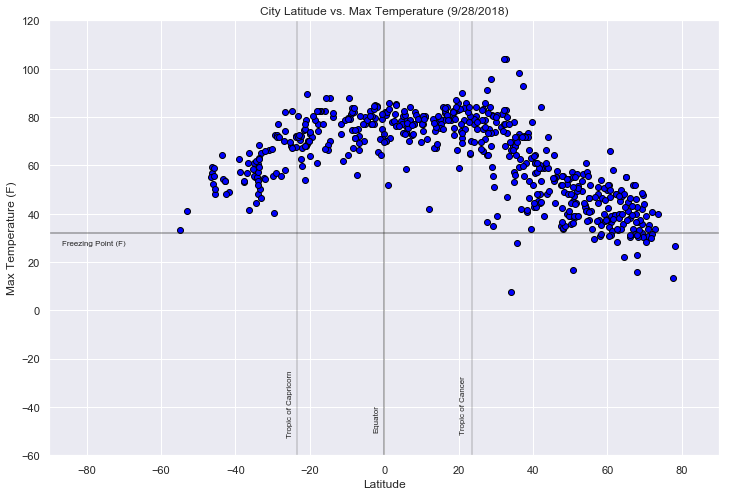

In [59]:
plt.figure(figsize = (12, 8))                                                # sets plot parameters
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-60, 120)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.axhline(32, c='k', alpha=.4)
plt.title('City Latitude vs. Max Temperature (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.gcf().text(.14, .49, 'Freezing Point (F)', fontsize=8, rotation='horizontal')

plt.savefig('foo.png')
plt.show()                                                                   # displays plot


#### Latitude vs. Humidity Plot

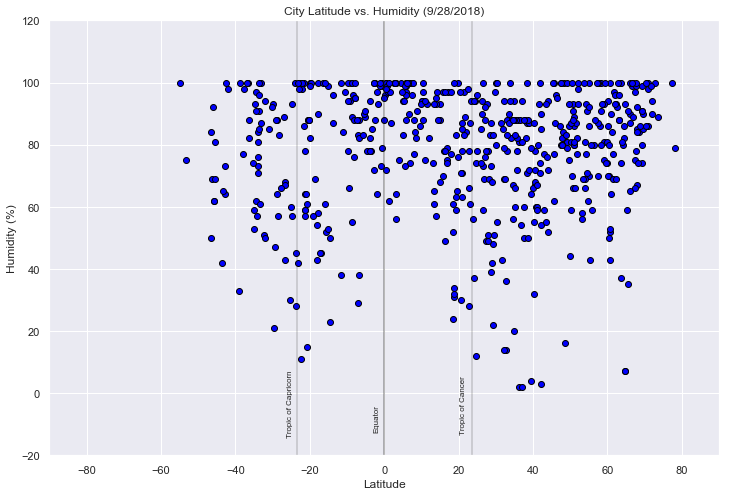

In [60]:
plt.figure(figsize = (12, 8))                                                # sets plot parameters
plt.scatter(cities_df['Lat'], cities_df['Humidity'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')

plt.savefig('humidity.png')
plt.show()                                                                   # displays plot

#### Latitude vs. Cloudiness Plot

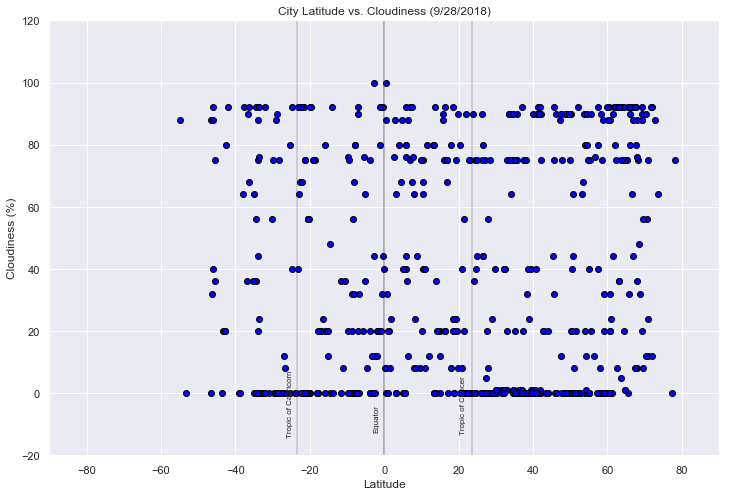

In [61]:
plt.figure(figsize = (12, 8))                                                # sets plot parameters
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')

plt.savefig('cloudiness.png')
plt.show()                                                                   # displays plot

#### Latitude vs. Wind Speed Plot

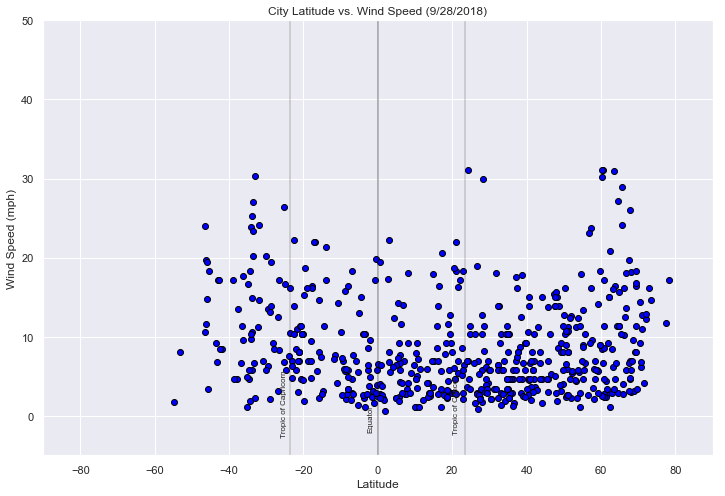

In [62]:
plt.figure(figsize = (12, 8))                                                # sets plot parameters
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')

plt.savefig('wind.png')
plt.show()                                                                   # displays plot

#### Bonus - Global Temperatures by Longitude and Latitiude

In [42]:
cities_df['temp_v'] = "xkcd:dark purple"                                     # adds column to df, sets <= 0 colors
cities_df.loc[cities_df['Max Temp'] > 0, 'temp_v'] = "xkcd:violet"           # assigns colors to temps by range
cities_df.loc[cities_df['Max Temp'] > 10, 'temp_v'] = "xkcd:indigo blue"
cities_df.loc[cities_df['Max Temp'] > 20, 'temp_v'] = "xkcd:blue"
cities_df.loc[cities_df['Max Temp'] > 30, 'temp_v'] = "xkcd:green"
cities_df.loc[cities_df['Max Temp'] > 40, 'temp_v'] = "xkcd:sea green"
cities_df.loc[cities_df['Max Temp'] > 50, 'temp_v'] = "xkcd:yellow green"
cities_df.loc[cities_df['Max Temp'] > 60, 'temp_v'] = "xkcd:yellow"
cities_df.loc[cities_df['Max Temp'] > 70, 'temp_v'] = "xkcd:orange"
cities_df.loc[cities_df['Max Temp'] > 80, 'temp_v'] = "xkcd:reddish orange"
cities_df.loc[cities_df['Max Temp'] > 90, 'temp_v'] = "xkcd:red"

In [63]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(cities_df['Lng'], cities_df['Lat'], color=cities_df["temp_v"], s=100,  alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Temperatures (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

templt0 = mpatches.Patch(color='xkcd:dark purple', label='<= 0')
tempgt0 = mpatches.Patch(color='xkcd:violet', label='> 0')
tempgt10 = mpatches.Patch(color='xkcd:indigo blue', label='> 10')
tempgt20 = mpatches.Patch(color='xkcd:blue', label='> 20')
tempgt30 = mpatches.Patch(color='xkcd:green', label='> 30')
tempgt40 = mpatches.Patch(color='xkcd:sea green', label='> 40')
tempgt50 = mpatches.Patch(color='xkcd:yellow green', label='> 50')
tempgt60 = mpatches.Patch(color='xkcd:yellow', label='> 60')
tempgt70 = mpatches.Patch(color='xkcd:orange', label='> 70')
tempgt80 = mpatches.Patch(color='xkcd:reddish orange', label='> 80')
tempgt90 = mpatches.Patch(color='xkcd:red', label='> 90')

plt.legend(handles=[templt0,
                    tempgt0,
                    tempgt10,
                    tempgt20,
                    tempgt30,
                    tempgt40,
                    tempgt50,
                    tempgt60,
                    tempgt70,
                    tempgt80,
                    tempgt90], frameon=True, loc="lower left")

plt.savefig('temperature_glob.png')
plt.show()                                                                   # displays plot

#### Bonus - Global Humidity by Longitude and Latitiude

In [46]:
cities_df['humdy_v'] = ""                                                    # adds column to dataframe
cities_df.loc[cities_df['Humidity'] >=0, 'humdy_v'] = "#FFFFFF"              # assigns colors to humidity by range
cities_df.loc[cities_df['Humidity'] > 10, 'humdy_v'] = "#E5E5FF"
cities_df.loc[cities_df['Humidity'] > 20, 'humdy_v'] = "#CCCCFF"
cities_df.loc[cities_df['Humidity'] > 30, 'humdy_v'] = "#B2B2FF"
cities_df.loc[cities_df['Humidity'] > 40, 'humdy_v'] = "#9999FF"
cities_df.loc[cities_df['Humidity'] > 50, 'humdy_v'] = "#7F7FFF"
cities_df.loc[cities_df['Humidity'] > 60, 'humdy_v'] = "#6666FF"
cities_df.loc[cities_df['Humidity'] > 70, 'humdy_v'] = "#4C4CFF"
cities_df.loc[cities_df['Humidity'] > 80, 'humdy_v'] = "#3333FF"
cities_df.loc[cities_df['Humidity'] > 90, 'humdy_v'] = "#1919FF"
cities_df.loc[cities_df['Humidity'] >= 100, 'humdy_v'] = "#0000FF"

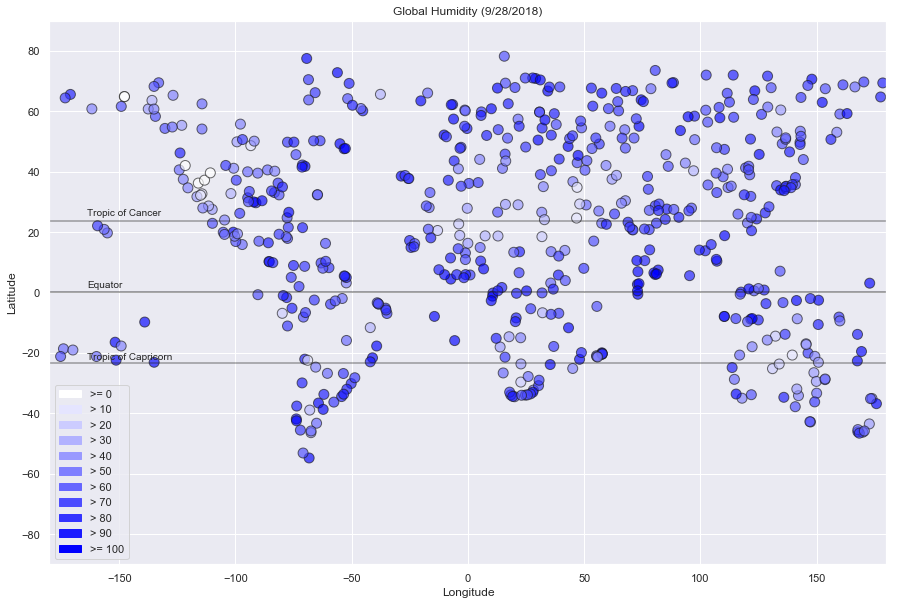

In [64]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(cities_df["Lng"], cities_df["Lat"], color=cities_df["humdy_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

humidityge0 = mpatches.Patch(color='#FFFFFF', label='>= 0')
humiditygt10 = mpatches.Patch(color='#E5E5FF', label='> 10')
humiditygt20 = mpatches.Patch(color='#CCCCFF', label='> 20')
humiditygt30 = mpatches.Patch(color='#B2B2FF', label='> 30')
humiditygt40 = mpatches.Patch(color='#9999FF', label='> 40')
humiditygt50 = mpatches.Patch(color='#7F7FFF', label='> 50')
humiditygt60 = mpatches.Patch(color='#6666FF', label='> 60')
humiditygt70 = mpatches.Patch(color='#4C4CFF', label='> 70')
humiditygt80 = mpatches.Patch(color='#3333FF', label='> 80')
humiditygt90 = mpatches.Patch(color='#1919FF', label='> 90')
humidityge100 = mpatches.Patch(color='#0000FF', label='>= 100')

plt.legend(handles=[humidityge0,
                    humiditygt10,
                    humiditygt20,
                    humiditygt30,
                    humiditygt40,
                    humiditygt50,
                    humiditygt60,
                    humiditygt70,
                    humiditygt80,
                    humiditygt90,
                    humidityge100], frameon=True, loc="lower left")

plt.savefig('humidity_glob.png')
plt.show()                                                                   # displays plot

#### Bonus - Global Cloudiness by Longitude and Latitiude

In [48]:
cities_df['cloud_v'] = ""                                                    # adds column to dataframe
cities_df.loc[cities_df['Cloudiness'] >= 0, 'cloud_v'] = "#0000FF"           # assigns colors to cloudiness by range
cities_df.loc[cities_df['Cloudiness'] > 10, 'cloud_v'] = "#1919FF"
cities_df.loc[cities_df['Cloudiness'] > 20, 'cloud_v'] = "#3333FF"
cities_df.loc[cities_df['Cloudiness'] > 30, 'cloud_v'] = "#4C4CFF"
cities_df.loc[cities_df['Cloudiness'] > 40, 'cloud_v'] = "#6666FF"
cities_df.loc[cities_df['Cloudiness'] > 50, 'cloud_v'] = "#7F7FFF"
cities_df.loc[cities_df['Cloudiness'] > 60, 'cloud_v'] = "#9999FF"
cities_df.loc[cities_df['Cloudiness'] > 70, 'cloud_v'] = "#B2B2FF"
cities_df.loc[cities_df['Cloudiness'] > 80, 'cloud_v'] = "#CCCCFF"
cities_df.loc[cities_df['Cloudiness'] > 90, 'cloud_v'] = "#E5E5FF"
cities_df.loc[cities_df['Cloudiness'] > 100, 'cloud_v'] = "#FFFFFF"

In [65]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(cities_df["Lng"], cities_df["Lat"], color=cities_df["cloud_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

cloudsge0 = mpatches.Patch(color='#0000FF', label='>= 0')
cloudsgt10 = mpatches.Patch(color='#1919FF', label='> 10')
cloudsgt20 = mpatches.Patch(color='#3333FF', label='> 20')
cloudsgt30 = mpatches.Patch(color='#4C4CFF', label='> 30')
cloudsgt40 = mpatches.Patch(color='#6666FF', label='> 40')
cloudsgt50 = mpatches.Patch(color='#7F7FFF', label='> 50')
cloudsgt60 = mpatches.Patch(color='#9999FF', label='> 60')
cloudsgt70 = mpatches.Patch(color='#B2B2FF', label='> 70')
cloudsgt80 = mpatches.Patch(color='#CCCCFF', label='> 80')
cloudsgt90 = mpatches.Patch(color='#E5E5FF', label='> 90')
cloudsge100 = mpatches.Patch(color='#FFFFFF', label='>= 100')

plt.legend(handles=[cloudsge0,
                    cloudsgt10,
                    cloudsgt20,
                    cloudsgt30,
                    cloudsgt40,
                    cloudsgt50,
                    cloudsgt60,
                    cloudsgt70,
                    cloudsgt90,
                    cloudsge100], frameon=True, loc="lower left")
plt.savefig('cloudiness_glob.png')
plt.show()                                                                   # displays plot


#### Bonus - Global Wind Speed by Longitude and Latitiude

In [50]:
cities_df['wind_v'] = ""                                                     # adds column to dataframe
cities_df.loc[cities_df['Wind Speed'] >= 0, 'wind_v'] = "xkcd:violet"        # assigns colors to wind speed by range
cities_df.loc[cities_df['Wind Speed'] > 5, 'wind_v'] = "xkcd:indigo blue"
cities_df.loc[cities_df['Wind Speed'] > 10, 'wind_v'] = "xkcd:blue"
cities_df.loc[cities_df['Wind Speed'] > 15, 'wind_v'] = "xkcd:green"
cities_df.loc[cities_df['Wind Speed'] > 20, 'wind_v'] = "xkcd:sea green"
cities_df.loc[cities_df['Wind Speed'] > 35, 'wind_v'] = "xkcd:yellow"
cities_df.loc[cities_df['Wind Speed'] > 30, 'wind_v'] = "xkcd:orange"
cities_df.loc[cities_df['Wind Speed'] > 35, 'wind_v'] = "xkcd:reddish orange"
cities_df.loc[cities_df['Wind Speed'] > 40, 'wind_v'] = "xkcd:red"


In [66]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(cities_df["Lng"], cities_df["Lat"], color=cities_df["wind_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

windge0 = mpatches.Patch(color='xkcd:violet', label='>= 0')
windgt5 = mpatches.Patch(color='xkcd:indigo blue', label='> 5')
windgt10 = mpatches.Patch(color='xkcd:blue', label='> 10')
windgt15 = mpatches.Patch(color='xkcd:green', label='> 15')
windgt20 = mpatches.Patch(color='xkcd:sea green', label='> 20')
windgt25 = mpatches.Patch(color='xkcd:yellow', label='> 25')
windgt30 = mpatches.Patch(color='xkcd:orange', label='> 30')
windgt35 = mpatches.Patch(color='xkcd:reddish orange', label='> 35')
windgt40 = mpatches.Patch(color='xkcd:red', label='> 40')

plt.legend(handles=[windge0, windgt5, 
                    windgt10, 
                    windgt15, 
                    windgt20, 
                    windgt25, 
                    windgt30, 
                    windgt35, 
                    windgt40], frameon=True, loc="lower left")
plt.savefig('wind_glob.png')
plt.show()                                                                   # displays plot